 # Notes and exercises from [Nielsen2015](http://neuralnetworksanddeeplearning.com/)
 ---

In [1]:
%reset


 ## Ch. 1.1 - Perceptrons

 $ y =
   \begin{cases}
       0 & \text{if } \sum_i w_i x_i \geq \text{threshold} \\
       1 & \text{if } \sum_i w_i x_i < \text{threshold}
   \end{cases} $

 where $y = \text{output}$, $x_i = \text{input}$, and $w_i = \text{weights}$.

 Rewrite conditions as $\mathbf{w} \cdot \mathbf{x} + b \leq 0$, $> 0$
 where $b = -\text{threshold}$ is the *bias*.

 Perceptrons can be combined to give $\text{AND}, \text{OR}, \text{NAND}$, etc.
 and perform any basic computation.

 ## Ch. 1.2 - Logistic/Sigmoid Neurons

 To optimize $w_i$, the output $y$ should be defined by
 a differentiable *transfer* or *activation* function.

 Let's replace it with the *logistic* or *sigmoid* function
 $$f(z) = \frac{1}{1 + \mathbf{e}^{-z}}$$
 where $z = \mathbf{w} \cdot \mathbf{x} + b$.

 Thus,
 $$\Delta y \approx \sum_i \frac{\partial y}{\partial w_i} \Delta w_i + \frac{\partial y}{\partial b} \Delta b$$

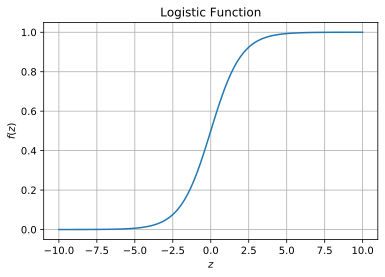

In [2]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-10, 10, 100)
f = 1/(1 + np.exp(-z))

plt.plot(z, f)
plt.xlabel('$z$')
plt.ylabel('$f(z)$')
plt.title('Logistic Function')
plt.rc('grid', linestyle = '--', color = 'gray')
plt.grid(True)
plt.show()


 ## Ch. 1.3 - Architecture of Neural Networks

 Layers: *input*, *hidden*, and *output*.

 *Feedforward* neural networks: no loop back.
 *Recurrent* neural networks: feedback loops allowed.

 ## Ch. 1.4 - Simple Network to Classify Handwritten Digits

 Read handwritten digits = *segmentation* + *classification*.

 Exercise: classify greyscale images of handwritten digits ($28 \times 28$ pixels) in
 [MNIST](http://yann.lecun.com/exdb/mnist/) dataset
 (60,000 labeled training images, 10,000 labeled test images)

 | Filename | Content | Size |
 | --- | --- | --- |
 | `train-images-idx3-ubyte.gz` | training set images | $9912422$ bytes |
 | `train-labels-idx1-ubyte.gz` | training set labels | $28881$ bytes |
 | `t10k-images-idx3-ubyte.gz` | test set images | $1648877$ bytes |
 | `t10k-labels-idx1-ubyte.gz` | test set labels | $4542$ bytes |
 Unzip and read test labels

In [3]:
%reset
import gzip 
with gzip.open('E:/Documents/Projects/learning-exercises/datasets/MNIST/t10k-labels-idx1-ubyte.gz', 'rb') as hFile:
    t10k_lab_data = hFile.read()
hFile.close()


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Convert binary data to integer array
print(int.from_bytes(t10k_lab_data[0:4], byteorder = 'big', signed = False))
t10k_num = int.from_bytes(t10k_lab_data[4:8], byteorder = 'big', signed = False)

t10k_lab = -1*np.ones((t10k_num, 1))
for i in range(t10k_num): 
    t10k_lab[i] = t10k_lab_data[i + 8]

# Delete bin data
t10k_lab_data = None
del t10k_lab_data


2049


In [5]:
# Unzip and read test images
with gzip.open('E:/Documents/Projects/learning-exercises/datasets/MNIST/t10k-images-idx3-ubyte.gz', 'rb') as hFile:
    t10k_img_data = hFile.read()
hFile.close()
hFile = None
del hFile 


In [6]:
# As before...
print(int.from_bytes(t10k_lab_data[0:4], byteorder = 'big', signed = False))
print(int.from_bytes(t10k_lab_data[4:(4+4)], byteorder = 'big', signed = False))
numRow = int.from_bytes(t10k_img_data[8:(8+4)], byteorder = 'big', signed = False)
numCol = int.from_bytes(t10k_img_data[12:(12+4)], byteorder = 'big', signed = False)

# Image data
numPix = numRow*numCol
t10k_img = -1*np.ones((t10k_num, numPix))
k = 0
for i in range(t10k_num):
    for j in range(numPix):
        k = k + 1
        t10k_img[i, j] = t10k_img_data[i*(numPix) + j + 16]

# Delete bin data
t10k_img_data = None
del t10k_img_data



NameError: name 't10k_lab_data' is not defined

NameError: name 't10k_img' is not defined

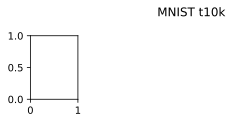

In [7]:
fig = plt.figure(1)
fig.suptitle('MNIST t10k')
for i in range(18):
    ax = fig.add_subplot(3, 6, i + 1)
    ax.imshow(np.reshape(t10k_img[i, 0:numPix], (numRow, numCol)))
    ax.set_aspect(aspect = 1)
    ax.tick_params(axis = 'x', bottom = False, labelbottom = False)
    ax.tick_params(axis = 'y', left = False, labelleft = False)
    ax.set_title('%(index)d (%(label)d)' % {'index': i, 'label': t10k_lab[i]})

ax = None
del ax
fig = None
del fig


 Approach: 784 nodes in input layer, $n = 15$ nodes in single hidden layer,
 10 nodes in output layer ($0 \ldots 9$).

 $x = (784 \times 1)$ vector, $y = (10 \times 1)$ vector

 Define a *cost* (*loss* or *objective*) function:
 $$C(\mathbf{w}, b) = \frac{1}{2 n} \sum_\mathbf{x} || \mathbf{y}(\mathbf{x}) - \mathbf{a} ||^2 $$
 where $n$ is the number of training inputs and
 $\mathbf{a} = \mathbf{a}(\mathbf{w}, \mathbf{x}, b)$ is the network output given $\mathbf{x}$.
 This $C$ is a *quadratic* cost function or the *mean square error* (MSE).

 Let's consider how to minimize $C$ over $\mathbf{w}, b$
 such that $\mathbf{a} \rightarrow \mathbf{y} \ \forall \ \mathbf{x}$ in the training set.

 One technique is *gradient descent*.
 $$\Delta C \approx \sum_i \frac{\partial C}{\partial w_i} \Delta w_i = \nabla C \cdot \Delta w $$
 where $\Delta w$ is chosen to be $-\eta \nabla C$ (for some $\eta > 0$)
 to ensure that $\Delta C = - \eta |\nabla C |^2 \leq 0 $.

 Thus, $\mathbf{w} \rightarrow \mathbf{w} - \eta \nabla C$
 would allow us to iteratively approach a (local) minimum of $C$,
 where $\eta = \frac{\epsilon}{| \nabla C |}$ and $\epsilon$ is some small value.

 Problem: Computation of $C$ becomes slow if there are many $\mathbf{x}$.

 Solution: *Stochastic gradient descent*
 $$ \nabla C \approx \sum_{\{\mathbf{x}\}} \nabla C_\mathbf{x}$$
 where $\{ \mathbf{x} \}$ is some small, randomly chosen subset of all $\mathbf{x}$.

 # Implementing network to classify the MNIST digits

In [8]:
# Import data
%reset
import gzip 
import numpy as np
import matplotlib.pyplot as plt

with gzip.open('E:/Documents/Projects/learning-exercises/datasets/MNIST/train-labels-idx1-ubyte.gz', 'rb') as hFile:
    train_lab_data = hFile.read()
hFile.close()
with gzip.open('E:/Documents/Projects/learning-exercises/datasets/MNIST/train-images-idx3-ubyte.gz', 'rb') as hFile:
    train_img_data = hFile.read()
hFile.close()

hFile = None
del hFile 


In [9]:
# Convert binary data to integer array

# Label data
print(int.from_bytes(train_lab_data[0:4], byteorder = 'big', signed = False))
train_num = int.from_bytes(train_lab_data[4:8], byteorder = 'big', signed = False)

train_lab = -1*np.ones((train_num, 1))
for i in range(train_num): 
    train_lab[i] = train_lab_data[i + 8]
train_lab_data = None
del train_lab_data

# Image data
print(int.from_bytes(train_img_data[0:4], byteorder = 'big', signed = False))
print(int.from_bytes(train_img_data[4:(4+4)], byteorder = 'big', signed = False))
numRow = int.from_bytes(train_img_data[8:(8+4)], byteorder = 'big', signed = False)
numCol = int.from_bytes(train_img_data[12:(12+4)], byteorder = 'big', signed = False)



2049
2051
60000


 Split 60k training set into smaller 50k training set
 and 10k *validation* set.
 Image data

In [10]:
numPix = numRow*numCol
train_img = -1*np.ones((5000, numPix))
valid_img = -1*np.ones((1000, numPix))
k = 0
for i in range(5000):
    for j in range(numPix):
        train_img[i, j] = train_img_data[i*(numPix) + j + 16]
        k = k + 1

for i in range(1000):
    for j in range(numPix):
        valid_img[i, j] = train_img_data[i*(numPix) + j + 16 + k]

train_img_data = None
del train_img_data

# Label data
valid_lab = train_lab[5000:6000]
train_lab = train_lab[0:5000]


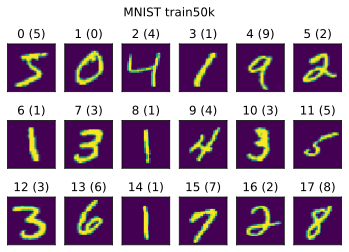

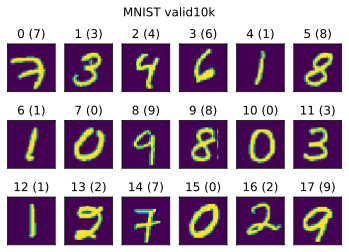

In [11]:
fig = plt.figure(1)
fig.suptitle('MNIST train50k')
for i in range(18):
    ax = fig.add_subplot(3, 6, i + 1)
    ax.imshow(np.reshape(train_img[i, 0:numPix], (numRow, numCol)))
    ax.set_aspect(aspect = 1)
    ax.tick_params(axis = 'x', bottom = False, labelbottom = False)
    ax.tick_params(axis = 'y', left = False, labelleft = False)
    ax.set_title('%(index)d (%(label)d)' % {'index': i, 'label': train_lab[i]})

fig = plt.figure(2)
fig.suptitle('MNIST valid10k')
for i in range(18):
    ax = fig.add_subplot(3, 6, i + 1)
    ax.imshow(np.reshape(valid_img[i, 0:numPix], (numRow, numCol)))
    ax.set_aspect(aspect = 1)
    ax.tick_params(axis = 'x', bottom = False, labelbottom = False)
    ax.tick_params(axis = 'y', left = False, labelleft = False)
    ax.set_title('%(index)d (%(label)d)' % {'index': i, 'label': valid_lab[i]})

ax = None
del ax
fig = None
del fig


 Define `Network` class with list `sizes`,
 where a neural network with 2, 3, 1 neurons in the 1st, 2nd, and 3rd layers
 is specified by `sizes = [2, 3, 1]`.
 The weights and biases are initialized to random values (Gaussian, mean $0$ and std dev $1$).

 `net.weights[0]` specifies the weights $\mathbf{w}$ connecting the neurons of the 1st and 2nd layers;
 `net.biases[0]`, the biases $\mathbf{b}$ of the neurons in the 2nd layer.

In [12]:
class Network(object):
    def __init__(self, sizes): 
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]


 Let's use $w_{jk}$ to denote the weight for the connection
 between the $k$th neuron of the 2nd layer and the $j$th neuron of the 3rd layer.
 Then, the vector of activations of the 3rd layer is given by
 $$ \mathbf{a}' = \sigma(\mathbf{W} \mathbf{a} + \mathbf{b})$$
 where $\mathbf{a}, \mathbf{b}$ is the vector of activations and biases of the 2nd layer,
 $(\mathbf{W})_{jk} = w_{jk}$ is the weight matrix, and $\sigma(z)$ is the activation function.

 Let's then add a `feedforward` method to the `Network` class to compute the output when
 given an input.

In [13]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

def feedforward(self, a):
    """Return the output of the network if "a" is input."""
    for b, w in zip(self.biases, self.weights):
        a = sigmoid(np.dot(w, a) + b)
    return a
Network.feedforward = feedforward


 Now add an stochastic gradient descent (`SGD`) method to `Network`
 for it to learn.

In [14]:
import random

def SGD(self, train_data, epochs, mini_batch_size, eta, test_data = None): 
    """
    Train the neural network using mini-batch stochastic gradient descent (SGD). 

    train_data -- a list of tuples (x, y) representing the training inputs and the desired outputs. 
    epochs -- number of epochs to train for
    mini_batch_size -- size of mini-batches to use for sampling
    eta -- learning rate

    If ``test_data`` is provided, then it will be evaluated by the network 
    after each epoch and partial progress will be printed out 
    (useful for tracking progress but slow).
    """
    if test_data: 
        n_test = len(test_data)

    n = len(train_data)
    for j in range(epochs): 
        
        random.shuffle(train_data)
        
        mini_batches = [train_data[k:(k + mini_batch_size)] for k in range(0, n, mini_batch_size)]

        for mini_batch in mini_batches:
            self.update_mini_batch(mini_batch, eta)
        
        if test_data: 
            print("Epoch {0}: {1} / {2}".format(j, self.evaluate(test_data), n_test))
        else: 
            print("Epoch {0} complete".format(j))

Network.SGD = SGD


 A function for updating the network weights and biases after each iteration of SGD

In [15]:
def update_mini_batch(self, mini_batch, eta):
    """
    Update the network weights and biases after iteration of stochastic gradient descent (SGD). 
    
    mini_batch --- list of tuples
    eta --- learning rate
    """
    nabla_b = [np.zeros(b.shape) for b in self.biases]
    nabla_w = [np.zeros(w.shape) for w in self.weights]
    for x, y in mini_batch: 
        delta_nabla_b, delta_nabla_w = self.backprop(x, y)
        nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
        nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
    
    self.weights = [w - (eta / len(mini_batch))*nw for w, nw in zip(self.weights, nabla_w)]

    self.biases = [b - (eta / len(mini_batch))*nb for b, nb in zip(self.biases, nabla_b)]

Network.update_mini_batch = update_mini_batch


 `backprop` refers to the *backpropagation* algorithm.

 Let's add the other helper functions:
 Backpropagation

In [16]:
def backprop(x, y):
    """
    Return a tuple (nabla_a, nabla_w) representing the gradient of the cost function C_x, 
    where nabla_a and nabla_w are layer-by-layer lists of numpy arrays 
    (like self.biases and self.weights).
    """
    nabla_b = [np.zeros(b.shape) for b in self.biases]
    nabla_w = [np.zeros(w.shape) for w in self.weights]

    # Feedforward
    activation = x
    activations = [x] # list to store all activations (layer-by-layer)
    zs = [] # list to store all z vectors (layer-by-layer)
    for b, w in zip(self.biases, self.weights):
        z = np.dot(w, activation) + b
        zs.append(z)
        activation = sigmoid(z)
        activations.append(activation)

    # Backward pass
    delta = self.cost_derivation(activations[-1], y) * sigmoid_prime(za[-1])
    nabla_b[-1] = delta
    nabla_w[-1] = np.dot(delta, activations[-2].transpose())

    # l = 1 -- last layer of neurons
    # l = 2 -- etc.
    for l in range(2, self.num_layers):
        z = zs[-1]
        sp = sigmoid_prime(z)
        delta = np.dot(self.weights[-l + 1].transpose(), delta) * sp
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-l - 1].transpose())
    
    return (nabla_b, nabla_w)

# Test function
def evaluate(self, test_data):
    """
    Return the number of test inputs for which the network outputs the correct results 
    (output = index of node with high activation).
    """
    test_results = [(np.argmax(self.feedforward(x)), y) for (x, y) in test_data]

    return sum(int(x == y) for (x, y) in test_results)

def cost_derivative(self, output_activations, y): 
    """
    Return the vector of partial derivatives (partial C_x / partial a) 
    for the output activations.
    """
    return (output_activations - y)

# Derivative of sigmoid function
def sigmoid_prime(z):
    """Derivative of the `sigmoid` function."""
    return sigmoid(z)*(1 - sigmoid(z))

Network.backprop = backprop
Network.evaluate = evaluate
Network.cost_derivative = cost_derivative


 Reshape train_lab to fit function -> list containing N 2-tuples (x, y)
 where x = 784-d ndarray and y = 10-d ndarray for the label.

In [17]:
train_lab_ = np.zeros((train_lab.shape[0], 10))
for i in range(train_lab.shape[0]):
    train_lab_[i][int(train_lab[i])] = 1

train_data = list(zip(train_img, train_lab_))
train_lab_ = None
del train_lab_

valid_lab_ = np.zeros((valid_lab.shape[0], 10))
for i in range(valid_lab.shape[0]):
    valid_lab_[i][int(valid_lab[i])] = 1

valid_data = list(zip(valid_img, valid_lab_))
valid_lab_ = None
del valid_lab_


 Training time:

In [18]:
net = Network([784, 20, 10])
net.SGD(train_data, 20, 10, 3.0, valid_data)


TypeError: backprop() takes 2 positional arguments but 3 were given